# Aula 7 - Métodos de Ensemble: Bagging e Random Forest

_________________

____
____
____

## 1) Métodos de Ensemble


Há uma classe de algoritmos de Machine Learning, os chamados **métodos de ensemble**, que tem como objetivo **combinar as predições de diversos estimadores mais simples** para gerar uma **predição final mais robusta**

Os métodos de ensemble costuman ser divididos em duas classes:

- **Métodos de média**: têm como procedimento geral construir diversos estimadores independentes, e tomar a média de suas predições como a predição final. O principal objetivo do método é reduzir **variância**, de modo que o modelo final seja melhor que todos os modelos individuais. Ex.: **random forest.**
<br>

- **Métodos de boosting**: têm como procedimento geral a construção de estimadores de forma sequencial, de modo que estimadores posteriores tentam reduzir o **viés** do estimador conjunto, que leva em consideração estimadores anteriores. Ex.: **adaboost**.

Há, ainda, uma terceira classe de método de ensemble, o chamado [stacking ensemble](https://machinelearningmastery.com/stacking-ensemble-machine-learning-with-python/), que consiste em "empilhar" modelos de modo a produzir a mistura. Não veremos esta modalidade em detalhes, mas deixo como sugestão para estudos posteriores! :)

Para mais detalhes sobre métodos de ensemble no contexto do sklearn, [clique aqui!](https://scikit-learn.org/stable/modules/ensemble.html)

Na aula de hoje, vamos conhecer em detalhes os procedimentos de bagging, explorando, particularmente, a **random forest**. Algumas abordagens de boosting serão exploradas em Machine Learning II.

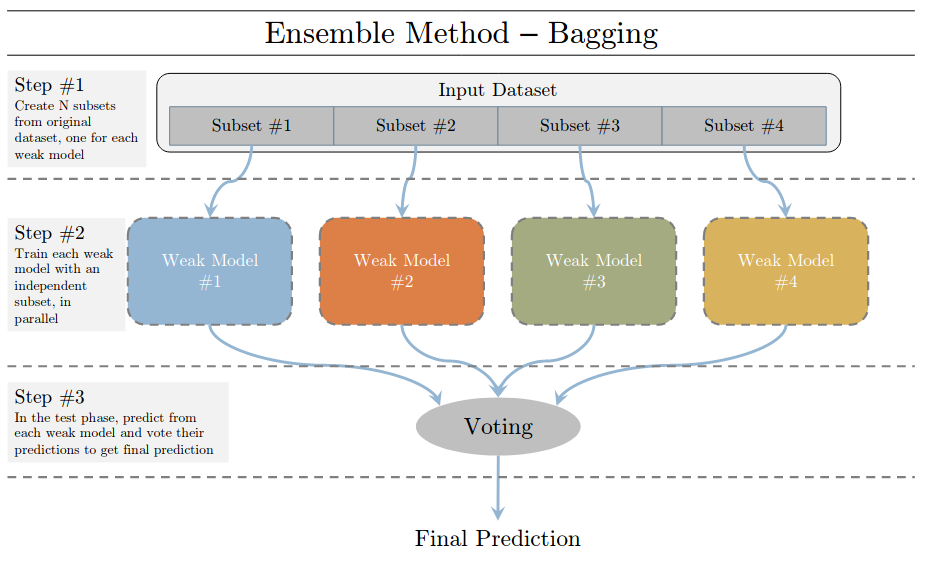<img src='images/bagging.png' style="width:900px"  text="http://cheatsheets.aqeel-anwar.com" />  

_________
_______
_________

## 2) Bagging & Random Forest

Uma técnica muito interessante (e muito performática!) baseada em árvores é o **Random Forest**.

Neste método, são criadas varias **árvores diferentes e independentes entre si**, através de um processo **aleatório**, e a predição final é tomada através da média das predições individuais!

<img src="https://i.ytimg.com/vi/goPiwckWE9M/maxresdefault.jpg" width=700>

O Random Forest utiliza os conceitos de **bootstrapping** e **aggregation** (ou então, o procedimento composto **bagging**) para criar um modelo composto que é melhor que uma única árvore!

<img src="https://c.mql5.com/2/33/image1__1.png" width=600>

Vamos entrender um pouco melhor cada componente do método!

### Bootstrapping

O procedimento de **bootstrapping** é utilizado no contexto do random forest para gerar os chamados **bootstrapped datasets**.

A ideia é bem simples! Para a criação de cada bootstrapped dataset, primeiro:

> Selecionamos **aleatoriamente com reposição** algumas linhas da base original. Isso gera um novo dataset (reamostrado), chamado de **bootstrapped dataset**. O número de linhas do dataset reamostrado é controlável.

Logo após, fazemos uma árvore de decisão **treinada neste dataset reamostrado**. Mas com um detalhe:

> Usamos apenas um **subconjunto aleatório das features** em cada avaliação de quebras (isso equivale ao `splitter="random"`). A quantidade de features a serem consideradas é controlável.

Com isso, muitas árvores são geradas (a quantidade também é controlável), cada uma seguindo o procedimento de bootstrap!

Note que o o procedimento de bootstrapping introduz **duas fontes de aleatoriedade**, cujo objetivo é **diminuir a variância** (tendência a overfitting) do modelo.

De fato, árvores individuais são facilmente overfitadas, como discutimos em aula (lembre-se da grande flexibilidade da hipótese em encontrar condições favoráveis à aprendizagem dos ruídos!).

Com esta aleatorização introduzida pelo bootstrapping, o objetivo é que as árvores construídas sejam **independentes**, de modo que **os erros cometidos por cada uma sejam independentes**. 

Deste modo, se considerarmos as previsões isoladas e de alguma forma **agregar** as previsões, a expectativa é que o modelo final seja **menos propenso a overfitting**! Mas, uma pergunta natural é: o que é essa "agragação"? Aqui entra o segundo elemento do bagging...

### Aggregation

Entendemos como o bootstrap é utilizado para gerar várias árvores independentes. 

Então, quando temos uma nova observação para atribuir o target, passamos as features **por cada uma das árvores**, e, naturalmente, cada árvore produz **o seu target**, que pode muito bem não ser o mesmo!

A **agregação** é utilizada para tomar a decisão final:

> No caso de classificação, a classe final é atribuída como **a classe majoritária**, isso é, **a classe que foi o output $\hat{y}$ mais vezes dentre todas as árvores**;

> No caso de regressão, o valor final é atribuído como **a média dos valores preditos $\hat{y}$ por cada árvore**.

Note que em ambos os casos, o procedimento de agregação pode ser visto como uma **média**, e o sklearn deixa isso explícito: "*In contrast to the original publication, the scikit-learn implementation combines classifiers by averaging their probabilistic prediction, instead of letting each classifier vote for a single class.*"

Tomando a média como procedimento de agregação, a expectativa é que **alguns erros sejam anulados**, garantindo uma previsão final **mais estável e mais generalizável**, dado que os ruídos são eliminados.

Juntando o bootstrapping com o aggregation, temos então o...

### Bagging

> Bagging: **b**ootstrap **agg**regat**ing**

Esquematicamente:

<img src=https://media.geeksforgeeks.org/wp-content/uploads/20210707140912/Bagging.png width=500>

As classes do random forest são:

- [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier)

- [RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor)

Ambos os métodos têm hiperparâmetros similares aos hiperparâmetros das árvores convencionais, aplicados a cada uma das árvores independentes.

Além destes, há dois hiperparâmetros bem importantes, referentes ao método de ensemble em si:

- `n_estimators` : controla quantas árvores independentes serão construídas (i.e., o número de árvores na floresta). Em geral, quanto mais árvores melhor (mas mais tempo vai demorar). Além disso, depois de uma determinade quantidade de árvores, os resultados vão parar de melhorar, pois há um limite para o bootstrap: depois de uma certa quantidade, as árvores deixam de ser tão independentes assim...
<br>

- `max_features`: o número de features no subconjunto aleatório de candidata a serem utilizadas em cada quebra. Quanto menor for o valor, mais conseguimos reduzir o overfitting, mas o underfitting é favorecido. Uma boa heurística é `max_features=None` para regressão e `max_features="sqrt"`para classificação, embora estratégias diferentes podem (e devem) ser testadas com o CV.


___

Para uma explicação bem visual sobre o funcionamento deste método, sugiro os vídeos do canal [StatQuest](https://www.youtube.com/watch?v=J4Wdy0Wc_xQ). 

Obs.: toda a [playlist de machine learning](https://www.youtube.com/playlist?list=PLblh5JKOoLUICTaGLRoHQDuF_7q2GfuJF) é muitíssimo interessante, com vídeos super claros e ilustrativos! Além disso, há outros vídeos de estatística que são muito bons! Este é um dos melhores canais no youtube para se aprender de forma clara e descontraída sobre estatística e machine learning!

_____________

Agora, vamos ver o Random Forest em ação!

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

In [4]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestClassifier

___
Vamos construir o passo a passo do pipeline do ciclo de modelagem, do pré-processamento à avaliação do modelo, e veremos como executar estas etapas utilizando a ferramenta que estudamos na última aula: o Pipeline.

#### 1. Divisão dos dados em treinamento e teste

In [7]:
df = pd.read_csv("german_credit_data.csv", index_col = 0)

# Separação entre features e target
X = df.drop(columns = "Risk")
y = df["Risk"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42, stratify = y)

In [6]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [8]:
X_train.shape

(750, 9)

In [9]:
X_test.shape

(250, 9)

#### 2. Tratamento de dados numéricos e categóricos

##### 2.1. Dados numéricos

In [11]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 750 entries, 123 to 744
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               750 non-null    int64 
 1   Sex               750 non-null    object
 2   Job               750 non-null    int64 
 3   Housing           750 non-null    object
 4   Saving accounts   614 non-null    object
 5   Checking account  449 non-null    object
 6   Credit amount     750 non-null    int64 
 7   Duration          750 non-null    int64 
 8   Purpose           750 non-null    object
dtypes: int64(4), object(5)
memory usage: 58.6+ KB


Vamos assumir que preencheremos valores nulos, nas colunas numéricas, com a média. Podemos utilizar o [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html) para fazê-lo!

In [49]:
# O SimpleImputer segue a mesma lógica de outros "transformers" que estudamos, como os de normalização/padronização
sim_imp = SimpleImputer(strategy = "mean").fit(X_train.select_dtypes(include = np.number))
X_train_num = sim_imp.transform(X_train.select_dtypes(include = np.number))
X_test_num = sim_imp.transform(X_test.select_dtypes(include = np.number))

# Scaling dos dados (após tratar os valores nulos)
scaler = StandardScaler()
scaler.fit(X_train_num)
X_train_num = scaler.transform(X_train_num)
X_test_num = scaler.transform(X_test_num)

In [20]:
# Não temos mais os valores nulos
np.isnan(X_train_num).sum()

0

In [21]:
X_train_num

array([[ 2.44707627,  0.14483103, -0.87309713, -0.89690223],
       [-0.46779223,  0.14483103, -0.923939  , -0.7335519 ],
       [-0.37946288,  0.14483103, -0.63392553, -1.2236029 ],
       ...,
       [ 1.38712409,  0.14483103, -0.1172719 ,  0.2465501 ],
       [-1.17442702,  0.14483103,  0.21928694,  0.73660111],
       [-0.46779223,  1.69659207,  3.92394051,  1.47167761]])

##### 2.2. Dados categóricos

In [28]:
from sklearn.preprocessing import OneHotEncoder

In [36]:
# Preenchimento de valores nulos (categóricos) com "unknown"
sim_imp_cat = SimpleImputer(strategy = "constant", fill_value = "unknown")
sim_imp_cat.fit(X_train.select_dtypes(exclude = np.number)) # excluímos tudo que for dado numérico
X_train_cat = sim_imp_cat.transform(X_train.select_dtypes(exclude = np.number))
X_test_cat = sim_imp_cat.transform(X_test.select_dtypes(exclude = np.number))

# One-hot encoding (similar ao get_dummies do pandas)
encoder = OneHotEncoder(sparse_output = False).fit(X_train_cat)
X_train_cat = encoder.transform(X_train_cat)
X_test_cat = encoder.transform(X_test_cat)

In [38]:
X_train.select_dtypes(exclude = np.number).iloc[0,:]

Sex                   male
Housing               free
Saving accounts     little
Checking account      rich
Purpose                car
Name: 123, dtype: object

In [42]:
X_train["Saving accounts"].unique()

array(['little', 'moderate', 'quite rich', nan, 'rich'], dtype=object)

In [35]:
X_train_cat[0, 0:10]

array([0., 1., 1., 0., 0., 1., 0., 0., 0., 0.])

##### 2.3. Juntando todas as features

In [43]:
X_train_num.shape

(750, 4)

In [44]:
X_train_cat.shape

(750, 22)

In [50]:
X_train_final = np.concatenate((X_train_num, X_train_cat), axis = 1)
X_test_final = np.concatenate((X_test_num, X_test_cat), axis = 1)

In [46]:
X_train_final.shape

(750, 26)

In [51]:
X_test_final.shape

(250, 26)

#### 3. Treinamento e avaliação do modelo

In [56]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

==== Avaliação no conjunto de treinamento ====


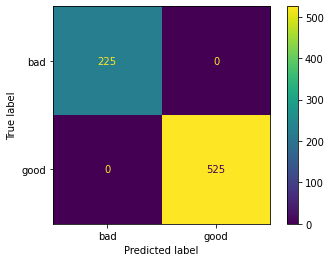

              precision    recall  f1-score   support

         bad       1.00      1.00      1.00       225
        good       1.00      1.00      1.00       525

    accuracy                           1.00       750
   macro avg       1.00      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750


==== Avaliação no conjunto de teste ====


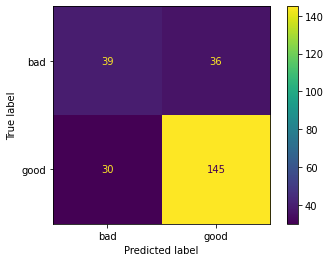

              precision    recall  f1-score   support

         bad       0.57      0.52      0.54        75
        good       0.80      0.83      0.81       175

    accuracy                           0.74       250
   macro avg       0.68      0.67      0.68       250
weighted avg       0.73      0.74      0.73       250



In [58]:
# Iniciamos o modelo
rf = RandomForestClassifier(random_state = 42)

# Treinamento do modelo
rf.fit(X_train_final, y_train)

# Avaliação no conjunto de treinamento
print("==== Avaliação no conjunto de treinamento ====")
y_pred_train = rf.predict(X_train_final)
ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
plt.show()
print(classification_report(y_train, y_pred_train))

print("\n==== Avaliação no conjunto de teste ====")
y_pred_test = rf.predict(X_test_final)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()
print(classification_report(y_test, y_pred_test))

___

Deste modo, temos uma aplicação do nosso classificador Random Forest!

No entanto, vale notar como todas as etapas de processamento foram trabalhosas, não é mesmo? Podemos simplificar consideravelmente o processo apenas **elencando** os passos que queremos executar, embutindo-os em um Pipeline! Vejamos abaixo:

### Aplicando o Pipeline

In [72]:
# LEITURA DOS DADOS E SEPARAÇÃO EM TREINO E TESTE
df = pd.read_csv("german_credit_data.csv", index_col = 0)

X = df.drop(columns = "Risk")
y = df["Risk"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

# =====================================
# TRATAMENTO DE FEATURES NUMÉRICAS
etapas_tratamento_num = [("input_num", SimpleImputer(strategy = "mean")),
                        ("Normalização", StandardScaler())]
pipe_features_num = Pipeline(etapas_tratamento_num)

features_num = X_train.select_dtypes(include = np.number).columns.tolist() # selecionando apenas dados numéricos

# =====================================
# TRATAMENTO DE FEATURES CATEGÓRICAS
etapas_tratamento_cat = [("input_cat", SimpleImputer(strategy = "constant", fill_value = "unknown")),
                        ("onehot", OneHotEncoder())]
pipe_features_cat = Pipeline(etapas_tratamento_cat)
features_cat = X_train.select_dtypes(exclude = np.number).columns.tolist() # selecionando apenas colunas categóricas

# ===================================
# APLICAÇÃO DE TRANSFORMAÇÕES NAS COLUNAS
pre_processador = ColumnTransformer([("transf_num", pipe_features_num, features_num),
                                    ("transf_cat", pipe_features_cat, features_cat)])

# pipeline final
pipe_rf = Pipeline([("pre_processamento", pre_processador),
                   ("RandomForest", RandomForestClassifier(random_state = 42))])

In [73]:
pipe_rf

Pipeline(steps=[('pre_processamento',
                 ColumnTransformer(transformers=[('transf_num',
                                                  Pipeline(steps=[('input_num',
                                                                   SimpleImputer()),
                                                                  ('Normalização',
                                                                   StandardScaler())]),
                                                  ['Age', 'Job',
                                                   'Credit amount',
                                                   'Duration']),
                                                 ('transf_cat',
                                                  Pipeline(steps=[('input_cat',
                                                                   SimpleImputer(fill_value='unknown',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder())]),
                                                  ['Sex', 'Housing',
                                                   'Saving accounts',
                                                   'Checking account',
                                                   'Purpose'])])),
                ('RandomForest', RandomForestClassifier(random_state=42))])

In [74]:
pipe_rf.fit(X_train, y_train)

Pipeline(steps=[('pre_processamento',
                 ColumnTransformer(transformers=[('transf_num',
                                                  Pipeline(steps=[('input_num',
                                                                   SimpleImputer()),
                                                                  ('Normalização',
                                                                   StandardScaler())]),
                                                  ['Age', 'Job',
                                                   'Credit amount',
                                                   'Duration']),
                                                 ('transf_cat',
                                                  Pipeline(steps=[('input_cat',
                                                                   SimpleImputer(fill_value='unknown',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder())]),
                                                  ['Sex', 'Housing',
                                                   'Saving accounts',
                                                   'Checking account',
                                                   'Purpose'])])),
                ('RandomForest', RandomForestClassifier(random_state=42))])

==== Avaliação no conjunto de treinamento ====


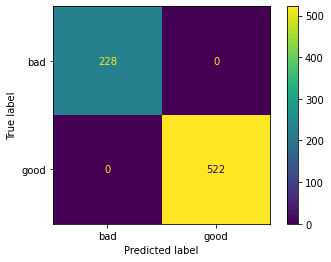

              precision    recall  f1-score   support

         bad       1.00      1.00      1.00       228
        good       1.00      1.00      1.00       522

    accuracy                           1.00       750
   macro avg       1.00      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750


==== Avaliação no conjunto de teste ====


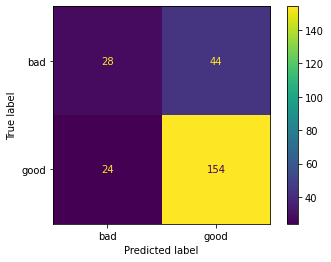

              precision    recall  f1-score   support

         bad       0.54      0.39      0.45        72
        good       0.78      0.87      0.82       178

    accuracy                           0.73       250
   macro avg       0.66      0.63      0.64       250
weighted avg       0.71      0.73      0.71       250



In [75]:
# Avaliação no conjunto de treinamento
print("==== Avaliação no conjunto de treinamento ====")
y_pred_train = pipe_rf.predict(X_train)
ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
plt.show()
print(classification_report(y_train, y_pred_train))

print("\n==== Avaliação no conjunto de teste ====")
y_pred_test = pipe_rf.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()
print(classification_report(y_test, y_pred_test))

Vejam que o resultado é exatamente o mesmo! 

Contudo, com a aplicação do Pipeline, podemos simplificar consideravelmente o código.

Apesar da boa performance no teste, é evidente que nosso modelo ainda está overfitado!

Isso é algo muito interessante do random forest: apesar de ser possível overfitá-lo, **a variância do erro de generalização vai a zero, conforme mais árvores são adicionadas**:

<img src=https://i.stack.imgur.com/8GU8U.png width=500>

Ou seja, um modelo de random forest **tende a ser mais estável** no que diz respeito à generalização!

Para evitar o overfitting em si, podemos usar as mesmas técnicas de regularização das árvores individuais, e aumentar o número de árvores na floresta:

In [77]:
params_grid = {"RandomForest__n_estimators": [100, 1000, 10000]}

grid_rf = GridSearchCV(estimator = pipe_rf,
                      param_grid = params_grid,
                      scoring = 'f1_weighted')
grid_rf.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('pre_processamento',
                                        ColumnTransformer(transformers=[('transf_num',
                                                                         Pipeline(steps=[('input_num',
                                                                                          SimpleImputer()),
                                                                                         ('Normalização',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'Job',
                                                                          'Credit '
                                                                          'amount',
                                                                          'Duration']),
                                                                        ('transf_cat',
                                                                         Pipeline(steps=[('input_cat',
                                                                                          SimpleImputer(fill_value='unknown',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder())]),
                                                                         ['Sex',
                                                                          'Housing',
                                                                          'Saving '
                                                                          'accounts',
                                                                          'Checking '
                                                                          'account',
                                                                          'Purpose'])])),
                                       ('RandomForest',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'RandomForest__n_estimators': [100, 1000, 10000]},
             scoring='f1_weighted')

In [79]:
grid_rf.best_params_

{'RandomForest__n_estimators': 1000}

In [80]:
grid_rf.best_score_

0.7128328617707177

==== Avaliação no conjunto de treinamento ====


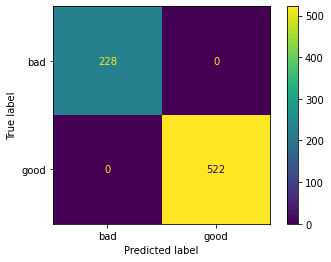

              precision    recall  f1-score   support

         bad       1.00      1.00      1.00       228
        good       1.00      1.00      1.00       522

    accuracy                           1.00       750
   macro avg       1.00      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750


==== Avaliação no conjunto de teste ====


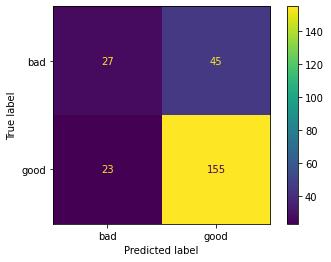

              precision    recall  f1-score   support

         bad       0.54      0.38      0.44        72
        good       0.78      0.87      0.82       178

    accuracy                           0.73       250
   macro avg       0.66      0.62      0.63       250
weighted avg       0.71      0.73      0.71       250



In [81]:
# Avaliação no conjunto de treinamento
print("==== Avaliação no conjunto de treinamento ====")
y_pred_train = grid_rf.predict(X_train)
ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
plt.show()
print(classification_report(y_train, y_pred_train))

print("\n==== Avaliação no conjunto de teste ====")
y_pred_test = grid_rf.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()
print(classification_report(y_test, y_pred_test))

In [85]:
# LEITURA DOS DADOS E SEPARAÇÃO EM TREINO E TESTE
df = pd.read_csv("german_credit_data.csv", index_col = 0)

X = df.drop(columns = "Risk")
y = df["Risk"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

# =====================================
# TRATAMENTO DE FEATURES NUMÉRICAS
etapas_tratamento_num = [("input_num", SimpleImputer(strategy = "mean")),
                        ("Normalização", StandardScaler())]
pipe_features_num = Pipeline(etapas_tratamento_num)

features_num = X_train.select_dtypes(include = np.number).columns.tolist() # selecionando apenas dados numéricos

# =====================================
# TRATAMENTO DE FEATURES CATEGÓRICAS
etapas_tratamento_cat = [("input_cat", SimpleImputer(strategy = "constant", fill_value = "unknown")),
                        ("onehot", OneHotEncoder())]
pipe_features_cat = Pipeline(etapas_tratamento_cat)
features_cat = X_train.select_dtypes(exclude = np.number).columns.tolist() # selecionando apenas colunas categóricas

# ===================================
# APLICAÇÃO DE TRANSFORMAÇÕES NAS COLUNAS
pre_processador = ColumnTransformer([("transf_num", pipe_features_num, features_num),
                                    ("transf_cat", pipe_features_cat, features_cat)])

# pipeline final
pipe_rf = Pipeline([("pre_processamento", pre_processador),
                   ("RandomForest", RandomForestClassifier(n_estimators = 5000, max_depth = 5, random_state = 42))])

In [86]:
pipe_rf.fit(X_train, y_train)

Pipeline(steps=[('pre_processamento',
                 ColumnTransformer(transformers=[('transf_num',
                                                  Pipeline(steps=[('input_num',
                                                                   SimpleImputer()),
                                                                  ('Normalização',
                                                                   StandardScaler())]),
                                                  ['Age', 'Job',
                                                   'Credit amount',
                                                   'Duration']),
                                                 ('transf_cat',
                                                  Pipeline(steps=[('input_cat',
                                                                   SimpleImputer(fill_value='unknown',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder())]),
                                                  ['Sex', 'Housing',
                                                   'Saving accounts',
                                                   'Checking account',
                                                   'Purpose'])])),
                ('RandomForest',
                 RandomForestClassifier(max_depth=5, n_estimators=5000,
                                        random_state=42))])

==== Avaliação no conjunto de treinamento ====


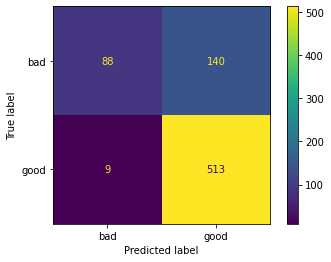

              precision    recall  f1-score   support

         bad       0.91      0.39      0.54       228
        good       0.79      0.98      0.87       522

    accuracy                           0.80       750
   macro avg       0.85      0.68      0.71       750
weighted avg       0.82      0.80      0.77       750


==== Avaliação no conjunto de teste ====


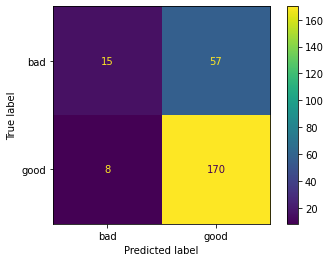

              precision    recall  f1-score   support

         bad       0.65      0.21      0.32        72
        good       0.75      0.96      0.84       178

    accuracy                           0.74       250
   macro avg       0.70      0.58      0.58       250
weighted avg       0.72      0.74      0.69       250



In [87]:
# Avaliação no conjunto de treinamento
print("==== Avaliação no conjunto de treinamento ====")
y_pred_train = pipe_rf.predict(X_train)
ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
plt.show()
print(classification_report(y_train, y_pred_train))

print("\n==== Avaliação no conjunto de teste ====")
y_pred_test = pipe_rf.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()
print(classification_report(y_test, y_pred_test))

Observação: podemos incluir o hiperparâmetro class_weight='balanced' no random forest para balancear as classes e obter um recall muuuuito bom

> **DICA**: o random forest é altamente paralelizável! (afinal, as árvores são independentes).
> Por este motivo, vale a pena utilizar o argumento `n_jobs`, para paralelizar e acelerar os cálculos!

Será que dá pra melhorar?? Podemos construir uma pipeline e fazer o grid/random search para buscar o melhor modelo!

In [14]:
# façam o gird/random search, pipeline completa...
# obs: cuidado com o parâmetro n_estimators! se a grade incluir muitas árvores, vai demorar!